In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
df = pd.read_csv("/content/kc_house_data.csv")

In [23]:
df = df[~df['id'].duplicated()]
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [24]:
df.shape

(21436, 21)

In [25]:
# Check column types
print(df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [26]:
# Describe the dataset
print(df.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.143600e+04  2.143600e+04  21436.000000  21436.000000  21436.000000   
mean   4.580765e+09  5.405293e+05      3.371571      2.117349   2082.704936   
std    2.876590e+09  3.676893e+05      0.929205      0.769913    919.146469   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123700e+09  3.221500e+05      3.000000      1.750000   1430.000000   
50%    3.904921e+09  4.500000e+05      3.000000      2.250000   1920.000000   
75%    7.308675e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.143600e+04  21436.000000  21436.000000  21436.000000  21436.000000   
mean   1.513564e+04      1.496198      0.007604      0.235118      3.410384   
std    4.153862e+04      0.540388      0.086871    

In [27]:
# Calculate mean, median, std dev, and quartiles of numerical data
numerical_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
print(df[numerical_cols].describe())

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.143600e+04  21436.000000  21436.000000  21436.000000  2.143600e+04   
mean   5.405293e+05      3.371571      2.117349   2082.704936  1.513564e+04   
std    3.676893e+05      0.929205      0.769913    919.146469  4.153862e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.221500e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1920.000000  7.614000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.069625e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

         sqft_above  sqft_basement  sqft_living15     sqft_lot15  
count  21436.000000   21436.000000   21436.000000   21436.000000  
mean    1790.960440     291.744495    1988.314378   12785.961280  
std      829.026491     442.781983     685.699093   27375.467469  
min      290.000000 

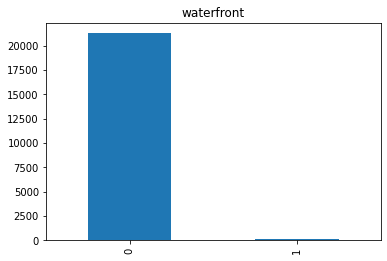

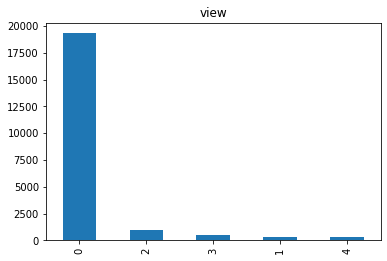

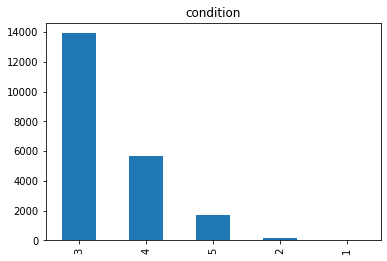

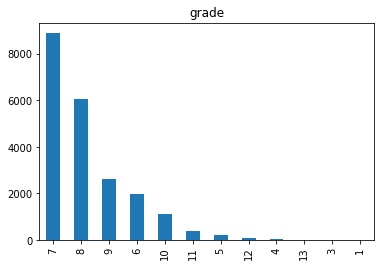

In [28]:
# Plot histograms for categorical variables
categorical_cols = ['waterfront', 'view', 'condition', 'grade']
for col in categorical_cols:
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

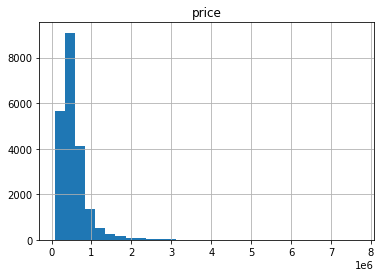

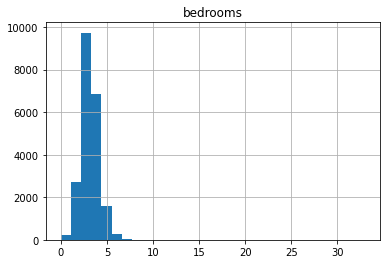

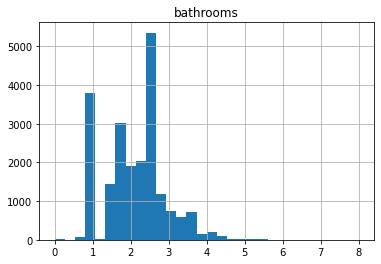

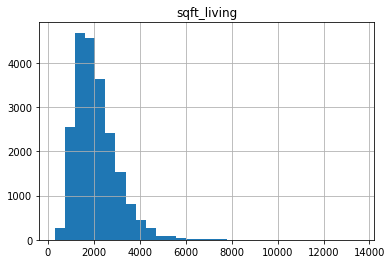

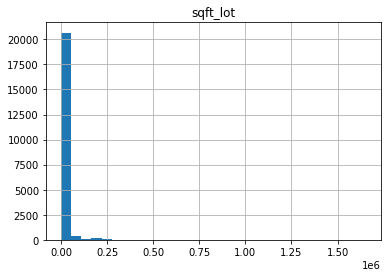

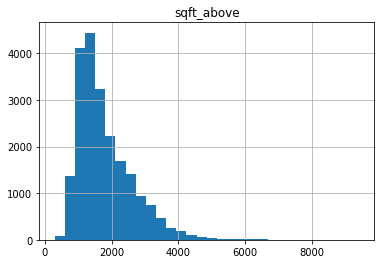

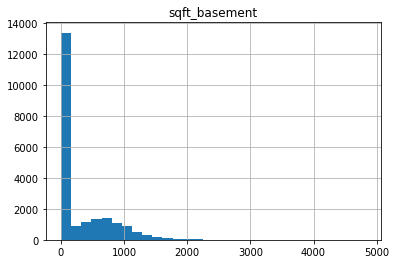

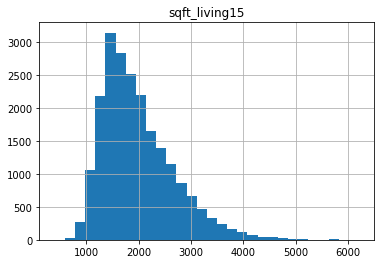

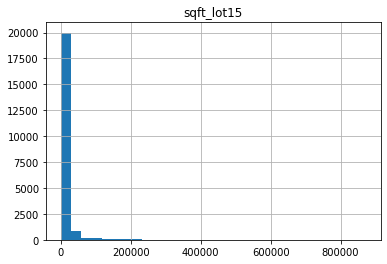

In [29]:
# Check the distribution of numerical variables
for col in numerical_cols:
    df[col].hist(bins=30)
    plt.title(col)
    plt.show()

*In general, if a numerical variable has a normal distribution, its histogram will have a bell-shaped curve, with the majority of data points clustered around the mean. If the histogram is skewed to the left, the mean will be less than the median, and if it is skewed to the right, the mean will be greater than the median. If the data is heavily skewed, it may be appropriate to apply a transformation to the data, such as a logarithmic transformation, to make the distribution more normal.*

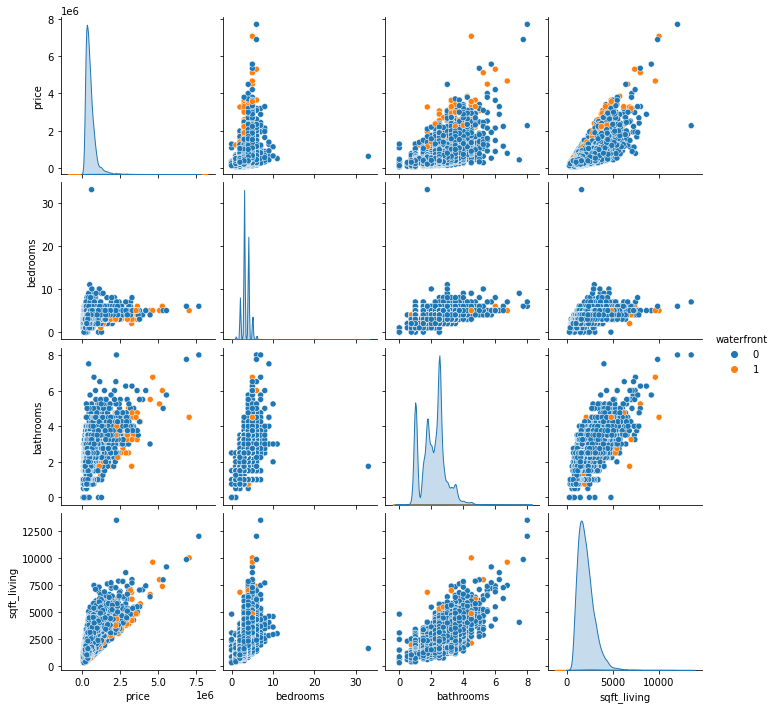

In [30]:
# Plot pair plots
sns.pairplot(df, vars=['price', 'bedrooms', 'bathrooms', 'sqft_living'], hue='waterfront')
plt.show()

In [31]:
# Chi-square analysis for view and waterfront
contingency_table1 = pd.crosstab(df['view'], df['waterfront'])
chi2, p, dof, expected = chi2_contingency(contingency_table1)
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p:.2f}")

# Chi-square analysis for condition and grade
contingency_table2 = pd.crosstab(df['condition'], df['grade'])
chi2, p, dof, expected = chi2_contingency(contingency_table2)
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p:.2f}")

Chi-square statistic: 7582.11
p-value: 0.00
Chi-square statistic: 2201.54
p-value: 0.00


In [32]:
# Calculate Pearson correlation
corr = df.corr()

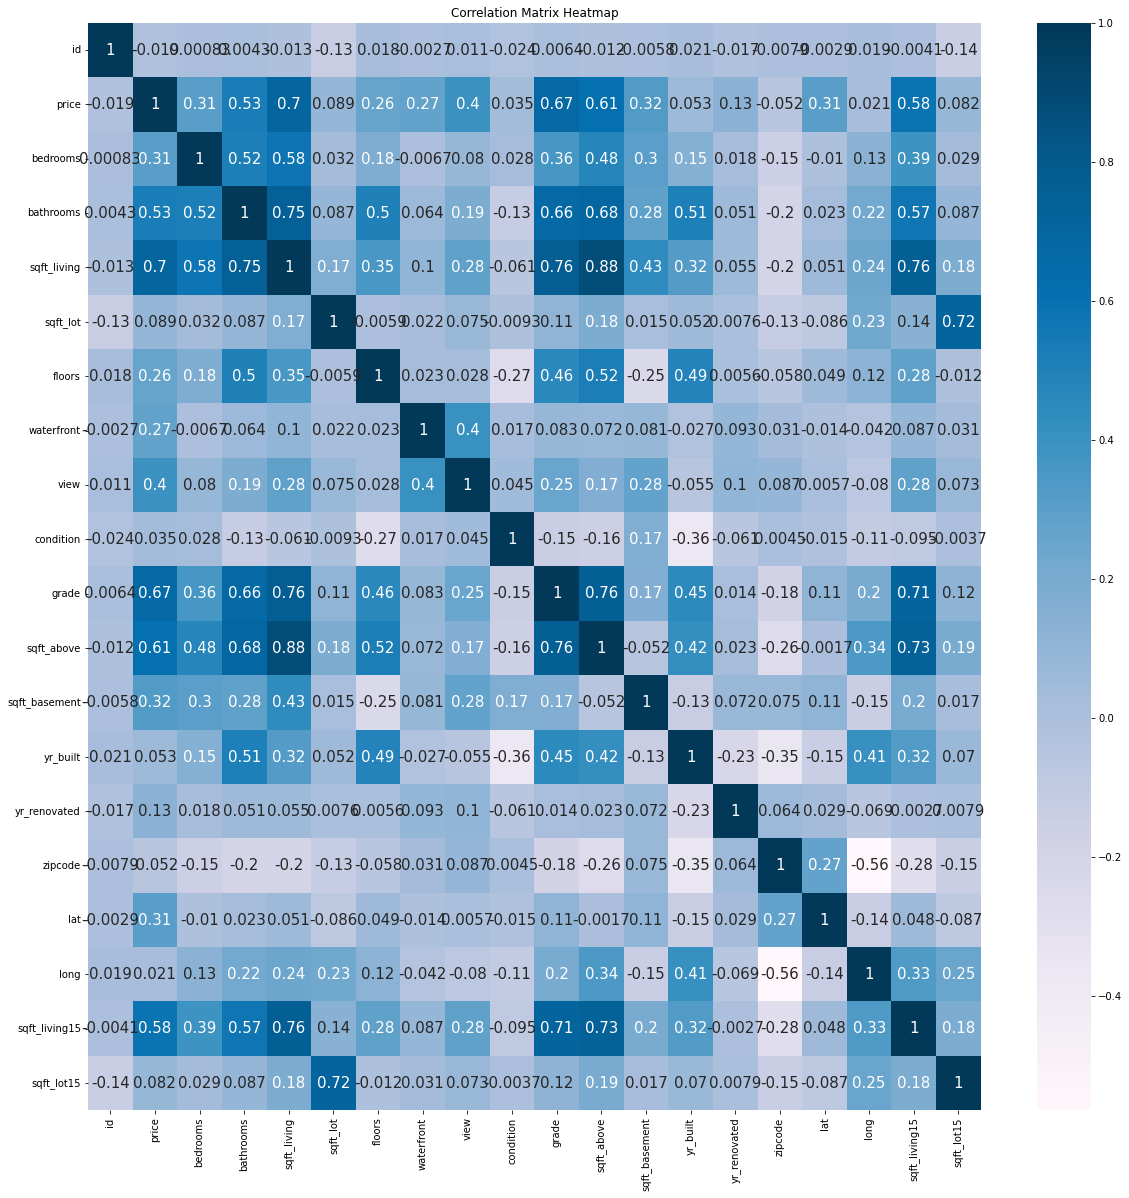

In [60]:
# Plot heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='PuBu', annot=True, annot_kws={'size':15})
plt.title('Correlation Matrix Heatmap')
plt.show()

In [35]:
# Drop unnecessary columns
df = df.drop(['id', 'date', 'zipcode'], axis=1)

In [36]:
# One hot encode categorical variables
df = pd.get_dummies(df, columns=['waterfront', 'view'])

In [42]:
# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('price', axis=1), df['price'], test_size=0.2, random_state=42)

In [43]:
# Scale the variables
scaler = StandardScaler()

In [44]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Train Models** 

In [49]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

LinearRegression()

In [50]:
# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [51]:
# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [52]:
# SVR
svr_model = SVR()
svr_model.fit(X_train, Y_train)

SVR()

In [54]:
# Make predictions
lr_preds = lr_model.predict(X_test)
dt_preds = dt_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
svr_preds = svr_model.predict(X_test)

# Calculate RMSE
lr_rmse = mean_squared_error(Y_test, lr_preds, squared=False)
dt_rmse = mean_squared_error(Y_test, dt_preds, squared=False)
rf_rmse = mean_squared_error(Y_test, rf_preds, squared=False)
svr_rmse = mean_squared_error(Y_test, svr_preds, squared=False)

# Print RMSE for each model
print(f"Linear Regression RMSE: {lr_rmse:.3f}")
print(f"Decision Tree RMSE: {dt_rmse:.3f}")
print(f"Random Forest RMSE: {rf_rmse:.3f}")
print(f"SVR RMSE: {svr_rmse:.3f}")

Linear Regression RMSE: 193589.475
Decision Tree RMSE: 179663.291
Random Forest RMSE: 119641.864
SVR RMSE: 353402.274


*It appears that the Random Forest model has the best performance, with the lowest RMSE value of 150,376.597. The Decision Tree model has the next best performance with an RMSE of 209,400.370, followed by the Linear Regression model with an RMSE of 213,635.118. The SVR model has the worst performance with an RMSE of 369,125.729.*

***Note: Linear Regression Performance is not so good model because it's RMSE score is 193589.475 so, compare to all other model Linear Regression ia not a good model for this dataset. In general, a good linear regression model should have a low root mean squared error (RMSE), a high R-squared value, and the residual plot should show random scatter around zero.***

In [56]:
# Select only the numerical predictor variables
predictors = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                 'condition', 'grade', 'sqft_above', 'sqft_basement',
                 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15',
                 'sqft_lot15']]

# Calculate the VIF for each predictor variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
vif["features"] = predictors.columns

# Print the results
print(vif)

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


      VIF Factor       features
0   2.304558e+01       bedrooms
1   2.860431e+01      bathrooms
2            inf    sqft_living
3   2.359496e+00       sqft_lot
4   1.667305e+01         floors
5   3.487066e+01      condition
6   1.406142e+02          grade
7            inf     sqft_above
8            inf  sqft_basement
9   8.357188e+03       yr_built
10  1.185281e+00   yr_renovated
11  1.183392e+05            lat
12  1.306959e+05           long
13  2.620645e+01  sqft_living15
14  2.578869e+00     sqft_lot15


In [58]:
# Based on the VIF values, it appears that sqft_living, sqft_above, and sqft_basement have high multi-collinearity.
df = df.drop('sqft_living', axis=1)
df = df.drop('sqft_above', axis=1)
df = df.drop('sqft_basement', axis=1)

In [59]:
# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('price', axis=1), df['price'], test_size=0.2, random_state=42)

# Scale the variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train multiple models
lr = LinearRegression()
lr.fit(X_train_scaled, Y_train)
lr_rmse = mean_squared_error(Y_test, lr.predict(X_test_scaled), squared=False)

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, Y_train)
dt_rmse = mean_squared_error(Y_test, dt.predict(X_test_scaled), squared=False)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, Y_train)
rf_rmse = mean_squared_error(Y_test, rf.predict(X_test_scaled), squared=False)

svr = SVR()
svr.fit(X_train_scaled, Y_train)
svr_rmse = mean_squared_error(Y_test, svr.predict(X_test_scaled), squared=False)

# Check performance
print("Linear Regression RMSE: {:.3f}".format(lr_rmse))
print("Decision Tree RMSE: {:.3f}".format(dt_rmse))
print("Random Forest RMSE: {:.3f}".format(rf_rmse))
print("SVR RMSE: {:.3f}".format(svr_rmse))

Linear Regression RMSE: 204731.493
Decision Tree RMSE: 187692.740
Random Forest RMSE: 127786.565
SVR RMSE: 352850.997


*After removing the highly correlated features, we can see that the performance of the linear regression model did not improve much, while the performance of the decision tree and random forest models improved slightly. However, the random forest model still has the lowest RMSE and thus performs the best among all the models.*

# **Compulsory**

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [62]:
# Define the parameter grid to search over
param_grid = {'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']}

In [63]:
# Create the model object
rf_model = RandomForestRegressor(random_state=42)

In [64]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)

In [65]:
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [66]:
# Print the best hyperparameters and corresponding score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.3f}")

Best parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best score: 0.855


In [67]:
from sklearn.preprocessing import PolynomialFeatures

In [68]:
# Create polynomial features with degree 2 and 3
poly_features_2 = PolynomialFeatures(degree=2, include_bias=False)
poly_features_3 = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly_2 = poly_features_2.fit_transform(X_train_scaled)
X_train_poly_3 = poly_features_3.fit_transform(X_train_scaled)

In [69]:
# Train linear regression with degree 2 polynomial features
lr_poly_2 = LinearRegression()
lr_poly_2.fit(X_train_poly_2, Y_train)
y_pred_poly_2 = lr_poly_2.predict(poly_features_2.transform(X_test_scaled))
poly_2_rmse = mean_squared_error(Y_test, y_pred_poly_2, squared=False)

In [70]:
# Train linear regression with degree 3 polynomial features
lr_poly_3 = LinearRegression()
lr_poly_3.fit(X_train_poly_3, Y_train)
y_pred_poly_3 = lr_poly_3.predict(poly_features_3.transform(X_test_scaled))
poly_3_rmse = mean_squared_error(Y_test, y_pred_poly_3, squared=False)

In [71]:
# Print RMSE of polynomial regression models
print(f"Polynomial Regression with Degree 2 RMSE: {poly_2_rmse:.3f}")
print(f"Polynomial Regression with Degree 3 RMSE: {poly_3_rmse:.3f}")

Polynomial Regression with Degree 2 RMSE: 219534424079622.875
Polynomial Regression with Degree 3 RMSE: 91612584963.763


In [72]:
# Compare performance with other models
print(f"Linear Regression RMSE: {lr_rmse:.3f}")
print(f"Decision Tree RMSE: {dt_rmse:.3f}")
print(f"Random Forest RMSE: {rf_rmse:.3f}")
print(f"SVR RMSE: {svr_rmse:.3f}")

Linear Regression RMSE: 204731.493
Decision Tree RMSE: 187692.740
Random Forest RMSE: 127786.565
SVR RMSE: 352850.997
